In [1]:
import sys
sys.path.append('../src/')

In [2]:
import os.path as osp
import os

import pandas as pd
import numpy as np

import seaborn as sb
from matplotlib import pyplot as plt

from metrics import fidelity_sparsity

from utils import normalize_bounds, load_curves

In [3]:
sb.set_theme(context='paper', style='white', font_scale=1.5, palette=None)

In [4]:
graph_model = 'cora'

In [5]:
explainer = 'ig'
decoder = 'inner'
for model_name in ['vgae', 'gin', 'gcn', 'sage']:
    print(model_name, len(os.listdir(f"../outputs/{graph_model}/{model_name}/{explainer}/curves/")))

vgae 1011
gin 671
gcn 629
sage 561


In [13]:
tot_range = 526

In [14]:
max_sparsity = 100

# Edges

In [33]:
model_name = 'vgae'

In [34]:
edge_deletions = load_curves(graph_model, model_name, explainer, 'edge_deletion', tot_range, target=-1, seed='0')
vgae_edge_scores = [fidelity_sparsity(d) for d in edge_deletions]

fidelity_vgae_edge = np.array([score_curve[:max_sparsity] for score_curve in vgae_edge_scores if len(score_curve)>=max_sparsity])

cora vgae ig edge_deletion 526 -1
500


In [35]:
model_name = 'gin'

In [36]:
edge_deletions = load_curves(graph_model, model_name, explainer, 'edge_deletion', tot_range, target=-1, seed='0')
gin_edge_scores = [fidelity_sparsity(d) for d in edge_deletions]

fidelity_gin_edge = np.array([score_curve[:max_sparsity] for score_curve in gin_edge_scores if len(score_curve)>=max_sparsity])

cora gin ig edge_deletion 526 -1
336


In [37]:
model_name = 'sage'

In [38]:
edge_deletions = load_curves(graph_model, model_name, explainer, 'edge_deletion', tot_range, target=-1, seed='0')
sage_edge_scores = [fidelity_sparsity(d) for d in edge_deletions]

fidelity_sage_edge = np.array([score_curve[:max_sparsity] for score_curve in sage_edge_scores if len(score_curve)>=max_sparsity])

cora sage ig edge_deletion 526 -1
281


In [41]:
model_name = 'gcn'

In [42]:
edge_deletions = load_curves(graph_model, model_name, explainer, 'edge_deletion', tot_range, target=-1, seed='0')
gcn_edge_scores = [fidelity_sparsity(d) for d in edge_deletions]

fidelity_gcn_edge = np.array([score_curve[:max_sparsity] for score_curve in gcn_edge_scores if len(score_curve)>=max_sparsity])

cora gcn ig edge_deletion 526 -1
315


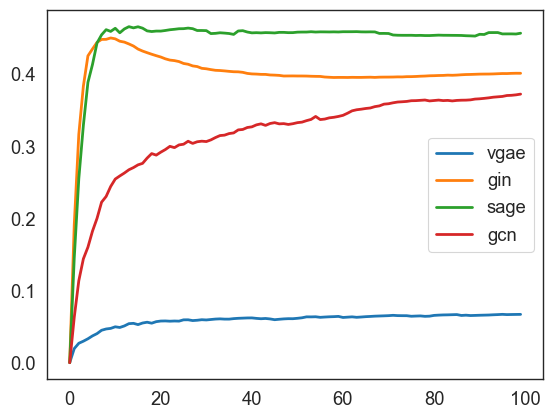

In [44]:
plt.plot(fidelity_vgae_edge.mean(axis=0), lw=2);
plt.plot(fidelity_gin_edge.mean(axis=0), lw=2);
plt.plot(fidelity_sage_edge.mean(axis=0), lw=2);
plt.plot(fidelity_gcn_edge.mean(axis=0), lw=2);
plt.legend(['vgae', 'gin', 'sage', 'gcn'])

# Feats

In [45]:
model_name = 'vgae'

In [46]:
feature_deletions = load_curves(graph_model, model_name, explainer, 'feature_deletion', tot_range, target=-1, seed='0')
vgae_feature_scores = [fidelity_sparsity(d) for d in feature_deletions]

fidelity_vgae_feature = np.array([score_curve[:max_sparsity] for score_curve in vgae_feature_scores if len(score_curve)>=max_sparsity])

cora vgae ig feature_deletion 526 -1
500


In [47]:
model_name = 'gin'

In [48]:
feature_deletions = load_curves(graph_model, model_name, explainer, 'feature_deletion', tot_range, target=-1, seed='0')
gin_feature_scores = [fidelity_sparsity(d) for d in feature_deletions]

fidelity_gin_feature = np.array([score_curve[:max_sparsity] for score_curve in gin_feature_scores if len(score_curve)>=max_sparsity])

cora gin ig feature_deletion 526 -1
335


In [49]:
model_name = 'sage'

In [50]:
feature_deletions = load_curves(graph_model, model_name, explainer, 'feature_deletion', tot_range, target=-1, seed='0')
sage_feature_scores = [fidelity_sparsity(d) for d in feature_deletions]

fidelity_sage_feature = np.array([score_curve[:max_sparsity] for score_curve in sage_feature_scores if len(score_curve)>=max_sparsity])

cora sage ig feature_deletion 526 -1
280


In [51]:
model_name = 'gcn'

In [52]:
feature_deletions = load_curves(graph_model, model_name, explainer, 'feature_deletion', tot_range, target=-1, seed='0')
gcn_feature_scores = [fidelity_sparsity(d) for d in feature_deletions]

fidelity_gcn_feature = np.array([score_curve[:max_sparsity] for score_curve in gcn_feature_scores if len(score_curve)>=max_sparsity])

cora gcn ig feature_deletion 526 -1
314


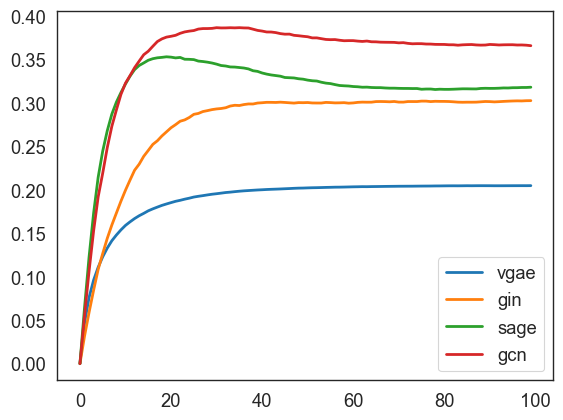

In [53]:
plt.plot(fidelity_vgae_feature.mean(axis=0), lw=2);
plt.plot(fidelity_gin_feature.mean(axis=0), lw=2);
plt.plot(fidelity_sage_feature.mean(axis=0), lw=2);
plt.plot(fidelity_gcn_feature.mean(axis=0), lw=2);
plt.legend(['vgae', 'gin', 'sage', 'gcn'])

In [18]:
feat_deletions = load_curves(graph_model, model_name, explainer, 'feature_deletion', tot_range, target=-1, seed=0)
vgae_feat_scores = [fidelity_sparsity(d) for d in feat_deletions]

fidelity_vgae_feat = np.array(vgae_feat_scores)

cora vgae ig feature_deletion 526 -1
500


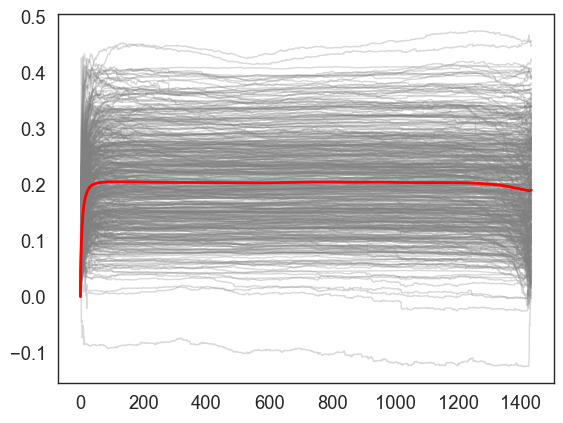

In [19]:
plt.plot(fidelity_vgae_feat.T, c='grey', alpha=.3, lw=1);
plt.plot(fidelity_vgae_feat.mean(axis=0), c='r', lw=2);

In [ ]:
feat_deletions = load_curves(graph_model, model_name, 'random', 'feature_deletion', 79, target=1)
vgae_feat_scores_rnd = [fidelity_sparsity(d) for d in feat_deletions]

fidelity_vgae_feat_rnd = np.array(vgae_feat_scores_rnd)

In [ ]:
plt.plot(fidelity_vgae_feat_rnd.T, c='grey', alpha=.3, lw=1);
plt.plot(fidelity_vgae_feat_rnd.mean(axis=0), c='r', lw=2);

# GIN

In [20]:
model_name = 'gin'

In [21]:
edge_deletions = load_curves(graph_model, model_name, explainer, 'edge_deletion', tot_range, target=-1, seed=0)
gin_edge_scores = [fidelity_sparsity(d) for d in edge_deletions]

fidelity_gin_edge = np.array([score_curve[:max_sparsity] for score_curve in gin_edge_scores if len(score_curve)>=max_sparsity])

cora gin ig edge_deletion 526 -1
336


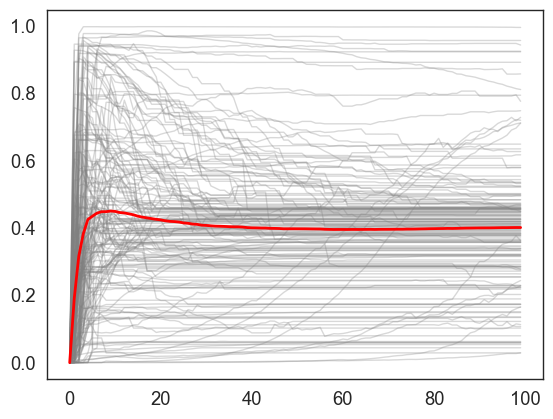

In [22]:
plt.plot(fidelity_gin_edge.T, c='grey', alpha=.3, lw=1);
plt.plot(fidelity_gin_edge.mean(axis=0), c='r', lw=2);

In [ ]:
edge_deletions = load_curves(graph_model, model_name, 'random', 'edge_deletion', 79, target=1)
gin_edge_scores_rnd = [fidelity_sparsity(d) for d in edge_deletions]

fidelity_gin_edge_rnd = np.array([score_curve[:max_sparsity] for score_curve in gin_edge_scores_rnd if len(score_curve)>=max_sparsity])

In [ ]:
plt.plot(fidelity_gin_edge_rnd.T, c='grey', alpha=.3, lw=1);
plt.plot(fidelity_gin_edge_rnd.mean(axis=0), c='r', lw=2);

In [23]:
feat_deletions = load_curves(graph_model, model_name, explainer, 'feature_deletion', tot_range, target=-1, seed=0)
gin_feat_scores = [fidelity_sparsity(d) for d in feat_deletions]

fidelity_gin_feat = np.array(gin_feat_scores)

cora gin ig feature_deletion 526 -1
335


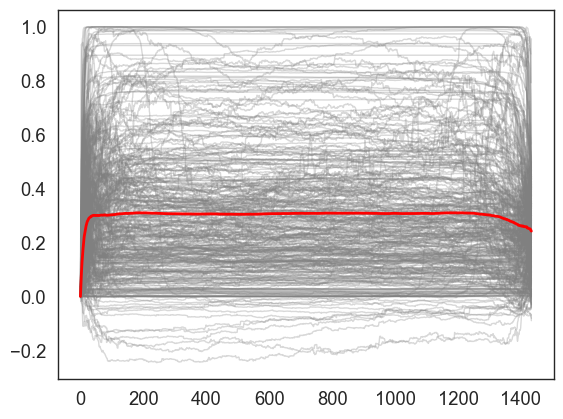

In [24]:
plt.plot(fidelity_gin_feat.T, c='grey', alpha=.3, lw=1);
plt.plot(fidelity_gin_feat.mean(axis=0), c='r', lw=2);

In [ ]:
feat_deletions = load_curves(graph_model, model_name, 'random', 'feature_deletion', 79, target=1)
gin_feat_scores_rnd = [fidelity_sparsity(d) for d in feat_deletions]

fidelity_gin_feat_rnd = np.array(gin_feat_scores_rnd)

In [ ]:
plt.plot(fidelity_gin_feat_rnd.T, c='grey', alpha=.3, lw=1);
plt.plot(fidelity_gin_feat_rnd.mean(axis=0), c='r', lw=2);

# Plots

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(fidelity_vgae_edge_rnd.mean(axis=0), lw=2);
axs[0].plot(fidelity_vgae_edge.mean(axis=0), lw=2);
axs[1].plot(fidelity_vgae_feat_rnd.mean(axis=0), lw=2);
axs[1].plot(fidelity_vgae_feat.mean(axis=0), lw=2);

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(fidelity_gin_edge_rnd.mean(axis=0), lw=2);
axs[0].plot(fidelity_gin_edge.mean(axis=0), lw=2);
axs[1].plot(fidelity_gin_feat_rnd.mean(axis=0), lw=2);
axs[1].plot(fidelity_gin_feat.mean(axis=0), lw=2);

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(fidelity_vgae_edge.mean(axis=0), lw=2);
axs[0].plot(fidelity_gin_edge.mean(axis=0), lw=2);
axs[1].plot(fidelity_vgae_feat.mean(axis=0), lw=2);
axs[1].plot(fidelity_gin_feat.mean(axis=0), lw=2);

In [ ]:
fidelity_vgae_edge_df = pd.DataFrame([normalize_bounds(v) for v in fidelity_vgae_edge]).T
fidelity_vgae_feat_df = pd.DataFrame([normalize_bounds(v) for v in fidelity_vgae_feat]).T
fidelity_gin_edge_df = pd.DataFrame([normalize_bounds(v) for v in fidelity_gin_edge]).T
fidelity_gin_feat_df = pd.DataFrame([normalize_bounds(v) for v in fidelity_gin_feat]).T

In [ ]:
fidelity_gin_edge_df.median(axis=1).plot(marker='.', legend=False)
fidelity_vgae_edge_df.median(axis=1).plot(marker='.', legend=False)

In [ ]:
concat = []
for i in range(fidelity_vgae_edge_df.shape[1]):
    tmp = fidelity_vgae_edge_df[i].to_frame().reset_index()
    tmp.columns = [ 'sparsity', 'fidelity']
    concat.append(tmp)

fidelity_vgae_edge_df = pd.concat(concat, axis=0)

In [ ]:
concat = []
for i in range(fidelity_vgae_feat_df.shape[1]):
    tmp = fidelity_vgae_feat_df[i].to_frame().reset_index()
    tmp.columns = [ 'sparsity', 'fidelity']
    concat.append(tmp)

fidelity_vgae_feat_df = pd.concat(concat, axis=0)

In [ ]:
concat = []
for i in range(fidelity_gin_edge_df.shape[1]):
    tmp = fidelity_gin_edge_df[i].to_frame().reset_index()
    tmp.columns = [ 'sparsity', 'fidelity']
    concat.append(tmp)

fidelity_gin_edge_df = pd.concat(concat, axis=0)

In [ ]:
concat = []
for i in range(fidelity_gin_feat_df.shape[1]):
    tmp = fidelity_gin_feat_df[i].to_frame().reset_index()
    tmp.columns = [ 'sparsity', 'fidelity']
    concat.append(tmp)

fidelity_gin_feat_df = pd.concat(concat, axis=0)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sb.lineplot(data=fidelity_vgae_edge_df, x='sparsity', y='fidelity', estimator='median', legend=True, err_kws={'alpha':0.1})
sb.lineplot(data=fidelity_gin_edge_df, x='sparsity', y='fidelity', estimator='median', legend=True, err_kws={'alpha':0.1})
ax.set_ylim([.5, 1])
ax.set_yticks([.5, .75, 1.])
# ax.set_xticklabels([str(t/max_sparsity) for t in ax.get_xticks()])
ax.set_xlabel('Sparsity (# edges removed)')
ax.set_ylabel('Fidelity')
ax.legend(['VGAE', 'GIN'])
sb.despine()
plt.tight_layout()
plt.savefig(f'../paper/figs/cora_fidelity_score_edges_{explainer}.png')

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sb.lineplot(data=fidelity_vgae_feat_df, x='sparsity', y='fidelity', estimator='median', legend=True, err_kws={'alpha':0.1})
sb.lineplot(data=fidelity_gin_feat_df, x='sparsity', y='fidelity', estimator='median', legend=True, err_kws={'alpha':0.1})
ax.set_ylim([.5, 1])
ax.set_yticks([.5, .75, 1.])
# ax.set_xticklabels([str(t/max_sparsity) for t in ax.get_xticks()])
ax.set_xlabel('Sparsity (# features removed)')
ax.set_ylabel('Fidelity')
ax.legend(['VGAE', 'GIN'])
sb.despine()
plt.tight_layout()
plt.savefig(f'../paper/figs/cora_fidelity_score_features_{explainer}.png')